# Capítulo 4. Preprocesamiento de Datos con Pandas

## Unidad 3. Preprocesamiento de datos de Pandas para la ejecución óptima del modelo

<br>

#### Ing. José Indalecio Ríos  
joseindalecio@uaz.edu.mx

<br>

En esta unidad, nos enfocaremos en el **preprocesamiento de datos** utilizando la librería **Pandas**, una herramienta esencial en el análisis y manipulación de datos en Python. El preprocesamiento es una etapa crucial para garantizar que los datos estén en el formato y calidad adecuados para el entrenamiento óptimo de los modelos de inteligencia artificial.

El contenido de esta unidad se desglosa a continuación:

- `1. Identificación y manejo de valores faltantes`
- `2. Detección y tratamiento de valores atípicos (outliers)`
- `3. Normalización y estandarización de datos`
- `4. Codificación de variables categóricas`
- `5. Visualización de datos`

Es importante entender algunos conceptos clave en este capítulo:

- **Valores faltantes:** datos que no están presentes en el conjunto y pueden afectar el rendimiento del modelo.
- **Valores atípicos:** observaciones que se desvían significativamente del resto y pueden distorsionar el análisis.
- **Normalización y estandarización:** técnicas para ajustar las escalas de las variables numéricas y mejorar la compatibilidad entre ellas.
- **Codificación de variables categóricas:** transformación de datos categóricos en numéricos para que puedan ser procesados por algoritmos de aprendizaje automático.
- **Visualización de datos:** herramientas gráficas que permiten comprender y explorar los datos de manera efectiva.

## Descripción de las características del conjunto de datos Titanic

El conjunto de datos Titanic contiene información sobre los pasajeros del famoso barco RMS Titanic, que se hundió en 1912. A continuación, se describen las características (columnas) presentes en el dataset:

- **survived**: Indica si el pasajero sobrevivió al desastre. Valor binario donde 0 = No sobrevivió, 1 = Sobrevivió.
- **pclass**: Clase del boleto del pasajero. 1 = Primera clase, 2 = Segunda clase, 3 = Tercera clase.
- **sex**: Sexo del pasajero (`male` para hombre, `female` para mujer).
- **age**: Edad del pasajero en años.
- **sibsp**: Número de hermanos/esposos a bordo del Titanic.
- **parch**: Número de padres/hijos a bordo del Titanic.
- **fare**: Tarifa pagada por el boleto del pasajero.
- **embarked**: Puerto de embarque del pasajero. Los valores posibles son:
  - `C` = Cherbourg
  - `Q` = Queenstown
  - `S` = Southampton
- **class**: Clase del pasajero en formato categórico (`First`, `Second`, `Third`). Es equivalente a `pclass` pero en formato de texto.
- **who**: Describe si el pasajero es hombre, mujer o niño (`man`, `woman`, `child`).
- **adult_male**: Indica si el pasajero es un hombre adulto. Valor booleano (`True`/`False`).
- **deck**: Cubierta en la que estaba el camarote del pasajero. Los valores van desde `A` hasta `G`.
- **embark_town**: Nombre de la ciudad de embarque del pasajero (`Cherbourg`, `Queenstown`, `Southampton`).
- **alive**: Indica si el pasajero sobrevivió (`yes`) o no (`no`). Es una versión categórica de `survived`.
- **alone**: Indica si el pasajero viajaba solo. Valor booleano (`True`/`False`).

Este conjunto de datos es ampliamente utilizado para ejercicios de aprendizaje automático y análisis estadístico, ya que permite explorar técnicas de preprocesamiento, visualización y modelado predictivo.


## Importar las librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Cargar el conjunto de datos

Para este ejemplo, utilizaremos el conjunto de datos **Titanic** disponible en Seaborn.

In [2]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 1. Identificación y manejo de valores faltantes

### Identificar valores faltantes

In [3]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### Manejo de valores faltantes

Eliminamos la columna `deck` debido a la gran cantidad de valores nulos.

In [4]:
df.drop('deck', axis=1, inplace=True)

Reemplazamos los valores nulos en `age` con la media de la columna.

In [5]:
df['age'].fillna(df['age'].mean(), inplace=True)

Reemplazamos los valores nulos en `embark_town` con el valor más frecuente.

In [6]:
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)

## 2. Detección y tratamiento de valores atípicos (outliers)

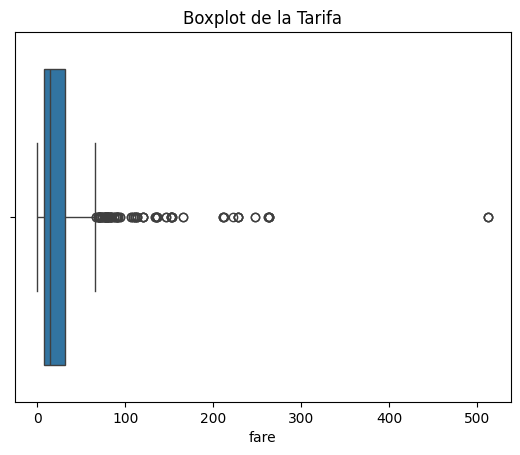

In [7]:
sns.boxplot(x=df['fare'])
plt.title('Boxplot de la Tarifa')
plt.show()

Eliminamos los valores atípicos en la columna `fare`.

In [9]:
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['fare'] >= lower_bound) & (df['fare'] <= upper_bound)]
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True
5,0,3,male,29.699118,0,0,8.4583,Q,Third,man,True,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


## 3. Normalización y estandarización de datos

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['age_scaled'] = scaler.fit_transform(df[['age']])
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_scaled
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False,-0.542633
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,-0.228652
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False,0.477804
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True,0.477804
5,0,3,male,29.699118,0,0,8.4583,Q,Third,man,True,Queenstown,no,True,0.061711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,Southampton,no,True,-0.150157
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,Southampton,yes,True,-0.778119
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,Southampton,no,False,0.061711
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,Cherbourg,yes,True,-0.228652


## 4. Codificación de variables categóricas

In [13]:
df = pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True)
df

KeyError: "None of [Index(['sex', 'embarked'], dtype='object')] are in the [columns]"

## 5. Visualización de datos

### Histograma de la edad

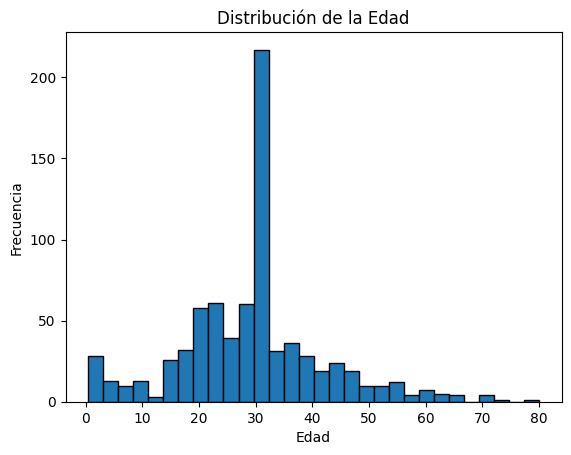

In [24]:
plt.hist(df['age'], bins=30, edgecolor='black')
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

### Boxplot de Clase vs Edad

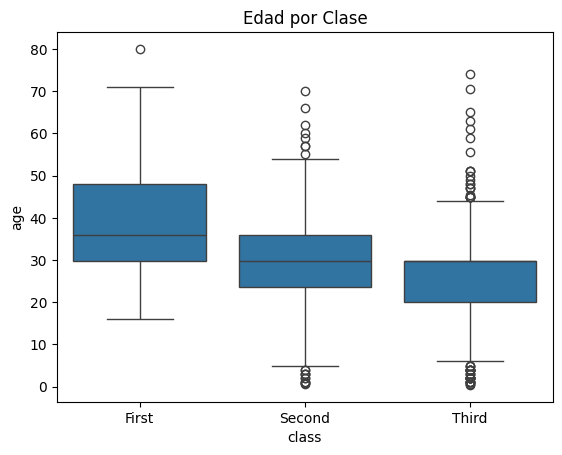

In [25]:
sns.boxplot(x='class', y='age', data=df)
plt.title('Edad por Clase')
plt.show()

### Gráfico de dispersión entre edad y tarifa

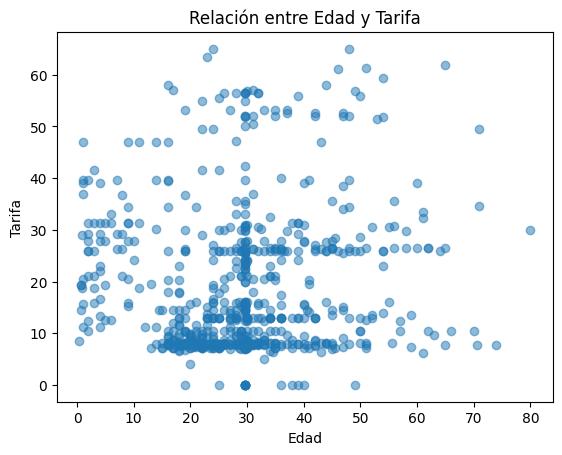

In [26]:
plt.scatter(df['age'], df['fare'], alpha=0.5)
plt.title('Relación entre Edad y Tarifa')
plt.xlabel('Edad')
plt.ylabel('Tarifa')
plt.show()